In [2]:
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from sklearn import metrics
import pandas as pd
from matplotlib.pyplot import savefig
from sklearn.metrics import roc_auc_score

In [3]:
def plot_roc_curve(match, nomatch, word_length):
    y = np.array((len(match)*[1])+(len(nomatch)*[0]))
    match_score = map(lambda x: 1-x, match)
    nomatch_score = map(lambda x: 1-x, nomatch)
    scores = np.array(list(match_score)+list(nomatch_score))
    tpr, fpr, thresholds = metrics.roc_curve(y, scores)
    auc = roc_auc_score(y, scores)
    plot_title = 'word length ' + str(word_length)
    plt.plot(tpr, fpr, label=plot_title+', AUC:%.2f' % auc)
    return auc

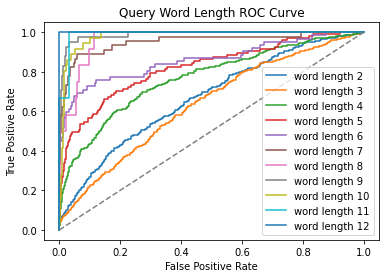

[(2, 0.6682062353818079), (3, 0.6347768362846903), (4, 0.7675732955091736), (5, 0.8223293970982355), (6, 0.8610647067902636), (7, 0.953394808119541), (8, 0.9654772591262717), (9, 0.9880207825493446), (10, 0.9796924862199015), (11, 0.9889889889889889), (12, 1.0)]


In [20]:
data = pd.read_pickle('500_common_words_with_respeaking.data')
auc = []
for word_length in range(2,13):
    match = []
    nomatch = []
    for sent in data['result']:
        for index, word in enumerate(sent['correct_words']):
            if len(word) == word_length:
                match.append(sent['correct_dtw'][index])
        for index, word in enumerate(sent['incorrect_words']):
            if len(word) == word_length:
                nomatch.append(sent['incorrect_dtw'][index])
    
    auc.append((word_length,plot_roc_curve(match, nomatch, word_length)))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Query Word Length ROC Curve')
plt.legend()
plt.savefig('word_length_roc_s.png', dpi=400)
plt.show()
#print(auc)

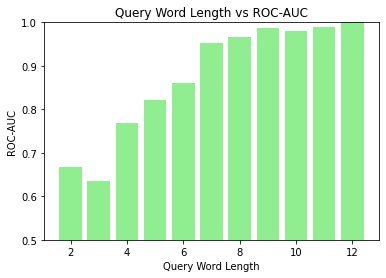

In [32]:
plt.bar(*zip(*auc), color='lightgreen')
plt.xlabel('Query Word Length')
plt.ylabel('ROC-AUC')
plt.title('Query Word Length vs ROC-AUC')
plt.ylim(0.5,1)
plt.savefig('word_length_vs_roc_auc.png', dpi=400)
plt.show()